In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fake_df = pd.read_csv("./Fake.csv")
true_df = pd.read_csv("./True.csv")

fake_df['label'] = 0   # Fake news
true_df['label'] = 1   # Real news

df = pd.concat([fake_df, true_df], axis=0) 
df = df.sample(frac=1).reset_index(drop=True)

df.head()


,title,text,subject,date,label
0,OOPS: Trump’s ‘Voter Fraud’ Panel BACKFIRES O...,"Well, that has to be embarrassing.Ever since E...",News,"June 22, 2017",0
1,London to set Northern Ireland budget as direc...,BELFAST/DUBLIN (Reuters) - The British governm...,worldnews,"November 1, 2017",1
2,TRUMP IS FINALLY Face-to-Face With Putin…Left ...,Heads are spinning since President Trump and V...,politics,"Nov 10, 2017",0
3,House tax chief says Obamacare taxes not part ...,WASHINGTON (Reuters) - The Republican-controll...,politicsNews,"March 27, 2017",1
4,GOP Senator Lashes Into Kellyanne Conway Over...,Despite how much the mainstream media and Amer...,News,"June 26, 2017",0


In [3]:
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (44898, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['text'] = df['text'].apply(clean_text)


In [6]:
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
tfidf = TfidfVectorizer(
    stop_words='english',
    max_df=0.7,
    ngram_range=(1,2)
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [8]:
model = LinearSVC()
model.fit(X_train_tfidf, y_train)


LinearSVC()

In [9]:
y_pred = model.predict(X_test_tfidf)



In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9942093541202672

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4661
           1       0.99      1.00      0.99      4319

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



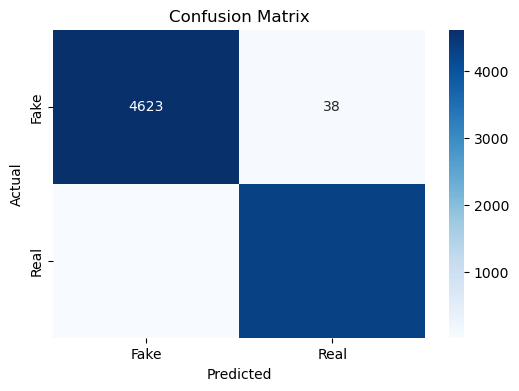

In [11]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
sample_news = ["US President Donald Trump says in a post on Truth Social that the United States control of Greenland is “vital” for his planned Golden Dome air and missile defence system."]

sample_cleaned = [clean_text(sample_news[0])]
sample_vector = tfidf.transform(sample_cleaned)

prediction = model.predict(sample_vector)

print("Prediction:", "Real News" if prediction[0] == 1 else "Fake News")


Prediction: Fake News
